# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 50kB/s 
     |████████████████████████████████| 3.8MB 55.6MB/s 
     |████████████████████████████████| 450kB 62.8MB/s 
     |████████████████████████████████| 81kB 12.4MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [4]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


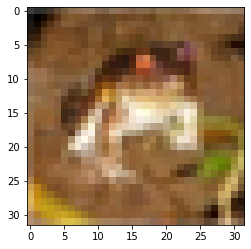

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
x_test.dtype

dtype('float64')

In [11]:
y_test.dtype

dtype('float32')

In [12]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
img_size=32


In [0]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#normalize data
#model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add Output Layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  896       
_________________________________________________________________
batch_normalization (BatchNo multiple                  128       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
batch_normalization_1 (Batch multiple                  256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('r8internal.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [29]:
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=5, # running 5 epochs rather than 10 because its taking longer time
          batch_size=32,
          workers=4)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 231s 5ms/sample - loss: 0.8589 - accuracy: 0.7043 - val_loss: 1.1576 - val_accuracy: 0.6158
Epoch 2/5
50000/50000 [==============================] - 236s 5ms/sample - loss: 0.7641 - accuracy: 0.7359 - val_loss: 1.0546 - val_accuracy: 0.6477
Epoch 3/5
50000/50000 [==============================] - 246s 5ms/sample - loss: 0.6908 - accuracy: 0.7610 - val_loss: 1.1143 - val_accuracy: 0.6405
Epoch 4/5
50000/50000 [==============================] - 235s 5ms/sample - loss: 0.6082 - accuracy: 0.7888 - val_loss: 1.1511 - val_accuracy: 0.6450
Epoch 5/5
50000/50000 [==============================] - 233s 5ms/sample - loss: 0.5342 - accuracy: 0.8130 - val_loss: 1.1963 - val_accuracy: 0.6449


In [46]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [30]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3))

553467904/553467096 [==============================] - 16s 0us/step


In [47]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import array_to_img,load_img,img_to_array

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/Great Learning/images"

In [0]:
import os

In [55]:
os.chdir('/content/drive/My Drive/Great Learning/images')
os.getcwd()
!ls

49436743043_2441587ab9_c.jpg  49441887332_107afa786d_c.jpg
49438170746_8378201627_c.jpg  4994221690_d070e8a355_c.jpg


In [0]:
img= load_img('/content/drive/My Drive/Great Learning/images/4994221690_d070e8a355_c.jpg')

In [58]:
!ls -l

total 408
-rw------- 1 root root  59788 Feb  2 09:38 49436743043_2441587ab9_c.jpg
-rw------- 1 root root 115131 Feb  2 09:38 49438170746_8378201627_c.jpg
-rw------- 1 root root 169389 Feb  2 09:38 49441887332_107afa786d_c.jpg
-rw------- 1 root root  72853 Feb  2 09:38 4994221690_d070e8a355_c.jpg


Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [62]:
#Prepare Input 
#VGG takes 224x224 image
model_input = img.resize((224,224))
model_input = tf.keras.preprocessing.image.img_to_array(model_input)

#Image array should be normalized in same way as was done for VGG training
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

#Add a dimension to input data to make it a 4D input as required by model
model_input = np.expand_dims(model_input, axis=0)
model_input.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [66]:
#Predict
prediction = vgg.predict(model_input)
prediction.shape

(1, 1000)

In [67]:
#Prediction Class
np.argmax(prediction[0])

504

In [68]:
tf.keras.applications.vgg16.decode_predictions(prediction)

40960/35363 [==================================] - 0s 0us/step


[[('n03063599', 'coffee_mug', 0.7589646),
  ('n07930864', 'cup', 0.07653641),
  ('n03063689', 'coffeepot', 0.07420046),
  ('n04398044', 'teapot', 0.029663049),
  ('n03950228', 'pitcher', 0.023501348)]]

#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
import pandas as pd

In [0]:
path1="/content/drive/My Drive/Great Learning/tweets.csv"

In [0]:
df1=pd.read_csv(path1,encoding='mac_roman')

In [123]:
df1.shape

(9093, 3)

In [124]:
df1.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion


**Drop null values**

*   Drop all the rows with null values




In [0]:
df=df1.dropna()

In [126]:
df.shape

(3291, 3)

**Print the dataframe**
*   print initial 5 rows of the data


In [127]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re

In [0]:
df = df.applymap(lambda s: s.lower())

In [0]:
df= df.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))

In [0]:
df= df.applymap(lambda s: s.strip())

In [132]:
df.shape

(3291, 3)

In [135]:
df.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion


## Question 3

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [136]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array(['negative emotion', 'positive emotion',
       'no emotion toward brand or product', 'i cant tell'], dtype=object)

In [0]:
df2 = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['negative emotion', 'positive emotion'])]

##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [148]:
df2.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


In [147]:
df2.shape

(3191, 3)

In [151]:
df2['is_there_an_emotion_directed_at_a_brand_or_product']=df2['is_there_an_emotion_directed_at_a_brand_or_product'].map({'positive emotion': 1, 'negative emotion': 0})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
df2['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

1    2672
0     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 5

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = df2['tweet_text']
y = df2['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.25)

In [156]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2393,)
(798,)
(2393,)
(798,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
# instantiate the vectorizer
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english', min_df=2)

In [0]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [0]:
X_test_dtm = vect.transform(X_test)

In [165]:
print(vect.get_feature_names()[-50:])

['year old', 'year sxsw', 'years', 'years day', 'years dayquot', 'years time', 'yelp', 'yelp covered', 'yelp killer', 'yelp sxsw', 'yep', 'yep link', 'yes', 'yes gowalla', 'yes link', 'yes updated', 'yesterday', 'york', 'york times', 'youd', 'youd expect', 'youd think', 'youll', 'youll make', 'youre', 'youre austin', 'youre missing', 'youre room', 'youre sxsw', 'youtube', 'youve', 'yr', 'yr fandango', 'yrs', 'yrsday', 'yrsday sxsw', 'zaarly', 'zaggle', 'zaggle showed', 'zappos', 'zappos amp', 'zazzlesxsw', 'zazzlesxsw sxsw', 'zazzlesxsw sxswi', 'zazzlsxsw', 'zazzlsxsw youll', 'zero', 'zms', 'zms mention', 'zombies']


## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [167]:
# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [172]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_class = logreg.predict(X_test_dtm)

In [169]:
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.91308199, 0.06323093, 0.70248924, 0.99893382, 0.21271217,
       0.71453136, 0.97110747, 0.93093829, 0.94448454, 0.98743005,
       0.08256624, 0.43076629, 0.88032226, 0.95789908, 0.99494465,
       0.87691452, 0.84238654, 0.97931686, 0.81639343, 0.91258403,
       0.95427645, 0.22970366, 0.97054567, 0.99852676, 0.37992824,
       0.93488522, 0.95612387, 0.97207796, 0.72110781, 0.10788352,
       0.9751293 , 0.99143367, 0.81080528, 0.20149279, 0.92154704,
       0.80009621, 0.99049735, 0.9646313 , 0.98689029, 0.98821552,
       0.74061647, 0.74575609, 0.1282915 , 0.96685145, 0.79452668,
       0.86554872, 0.89974066, 0.77514291, 0.42027011, 0.78633849,
       0.96757954, 0.38769876, 0.99186722, 0.55166847, 0.63824548,
       0.99560412, 0.73863697, 0.98050464, 0.97446787, 0.65917322,
       0.99135869, 0.56095038, 0.95784244, 0.98985209, 0.61733999,
       0.78528687, 0.75962004, 0.73598471, 0.7225533 , 0.99140043,
       0.95319394, 0.97311638, 0.95633243, 0.9761201 , 0.95076

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [174]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8571428571428571

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [170]:
metrics.accuracy_score(y_test, y_pred_class)

0.8659147869674185